In [1]:
from top2vec import Top2Vec
from gensim.models.coherencemodel import CoherenceModel
import os
import pandas as pd
from nltk.tokenize import word_tokenize

import gensim.corpora as corpora
from utils.config import random_sample,seed

In [2]:
import os
import pandas as pd

In [3]:
from utils.filemanagement import load_from_file, write_topics_file, get_project_root

model_type = "top2vec"
model_name = "Top2Vec"
embedding_model = "distiluse-base-multilingual-cased"
data_type = "np_mini_stopwords"
file_name=f"{model_type}_{embedding_model}_{data_type}"
folder_path_data =f"preprocessed_data"
file_name_data = f"{data_type}.csv"

experiment="embedding"
folder_path_topics = f"preprocessed_data/results/embedding/{model_type}"
folder_path_word_cloud = f"preprocessed_data/wordclouds/{experiment}/{model_type}/{file_name}"
file_name_data = f"{data_type}.csv"

folder_name = f"Embedding-experiment/models/{model_type}"
ROOT_PATH = get_project_root()
file_path = os.path.join(ROOT_PATH,folder_name,file_name)


df = load_from_file(folder_path_data,file_name_data)



data = df.text.values.tolist()
new_data = []
for item in data:
    new_data.append(str(item))

In [4]:
topic_model = None
try:
    topic_model = Top2Vec.load(file_path)
except:
    print("success")
    topic_model = Top2Vec(documents = new_data, embedding_model="NbAiLab/nb-sbert-base")

In [5]:
topic_model.save(file_path)

In [6]:
print(topic_model.embedding_model)

NbAiLab/nb-sbert-base


In [7]:
num_topics = topic_model.get_num_topics()
print(num_topics)

23


In [8]:
topic_sizes, topic_nums = topic_model.get_topic_sizes()

In [9]:
topic_words, word_scores, topic_nums = topic_model.get_topics(num_topics)

In [10]:
topic_word_scores = [dict(zip(topic_words[i][:], word_scores[i])) for i in topic_nums]

In [11]:
topic_model.get_topics()

(array([['saksordføreren', 'stortingets', 'høring', ..., 'partier',
         'forslag', 'innstilling'],
        ['barnevernet', 'kontantstøtten', 'kommunesektoren', ...,
         'kommunar', 'regjeringer', 'midlene'],
        ['økonomien', 'statsbudsjettet', 'statsbudsjett', ...,
         'politikere', 'styrking', 'stortinget'],
        ...,
        ['stortingets', 'landbruket', 'dyr', ..., 'dagsordenen',
         'bekymring', 'staten'],
        ['fengsel', 'kriminalitet', 'politi', ..., 'politikken',
         'tilfeller', 'behandlet'],
        ['boliger', 'bolig', 'finansiering', ..., 'fattigdom', 'pengene',
         'skattelette']], dtype='<U15'),
 array([[0.6260628 , 0.6178971 , 0.6001148 , ..., 0.49217647, 0.48979387,
         0.48931307],
        [0.6091175 , 0.55324787, 0.5158954 , ..., 0.41428533, 0.41355446,
         0.41345796],
        [0.5823722 , 0.55659294, 0.5565667 , ..., 0.44079423, 0.44012445,
         0.43958375],
        ...,
        [0.41559893, 0.40427756, 0.398761

In [12]:
for i in range(num_topics):
    print("\n", i)
    print(topic_word_scores[i])



 0
{'saksordføreren': 0.6260628, 'stortingets': 0.6178971, 'høring': 0.6001148, 'regjeringens': 0.5844942, 'stortinget': 0.5775783, 'storting': 0.5763197, 'proposisjonen': 0.5749749, 'politikere': 0.57134056, 'representanten': 0.5621025, 'dagsordenen': 0.5607478, 'vedtak': 0.5598109, 'vedtaket': 0.5543545, 'representanter': 0.5446182, 'politikk': 0.54443884, 'representantene': 0.5436289, 'innstillingen': 0.5389653, 'statsradens': 0.53591734, 'politikken': 0.5340893, 'regjeringa': 0.5332839, 'partiene': 0.53193784, 'velger': 0.52959025, 'fremmet': 0.5270594, 'opposisjonen': 0.5252508, 'innstillinga': 0.522913, 'utredning': 0.52204096, 'valg': 0.5178157, 'regjeringen': 0.5172285, 'regjeringer': 0.51479685, 'diskutert': 0.5145215, 'hevder': 0.5134307, 'komiteens': 0.5108216, 'saker': 0.5089658, 'debatter': 0.5088257, 'statsrad': 0.5077271, 'politiske': 0.50477123, 'vedtatt': 0.5038873, 'statsraden': 0.5018206, 'prioritering': 0.498891, 'vedta': 0.49839824, 'partiet': 0.49754196, 'behandl

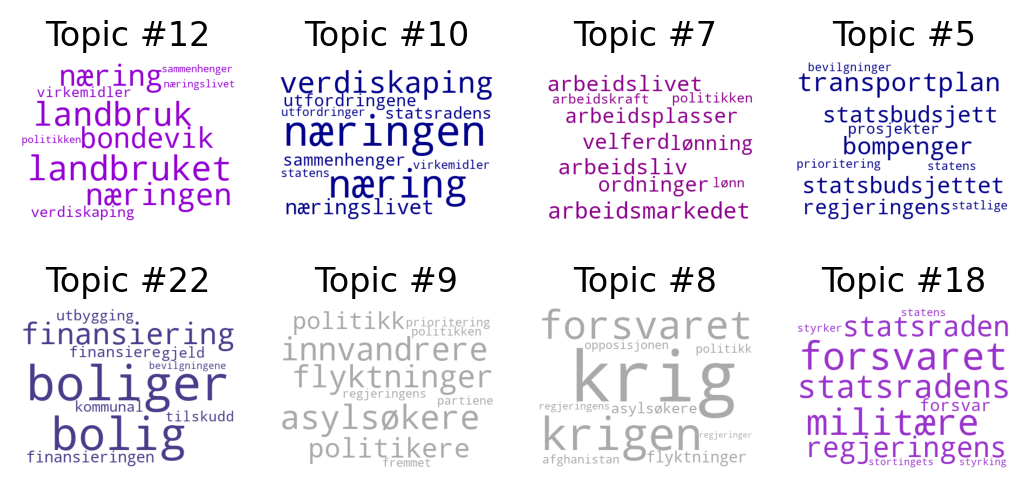

In [13]:

from utils.filemanagement import make_excerpt_wordcloud

excerpt_wordcloud = make_excerpt_wordcloud(topic_word_scores, num_topics,
                                           f"Sample from {model_name}-{embedding_model}: {data_type}",
                                           random_sample=random_sample, seed=seed)

excerpt_wordcloud.savefig(os.path.join(ROOT_PATH,folder_path_word_cloud,f"{file_name}_wordcloud_sample"),bbox_inches="tight")

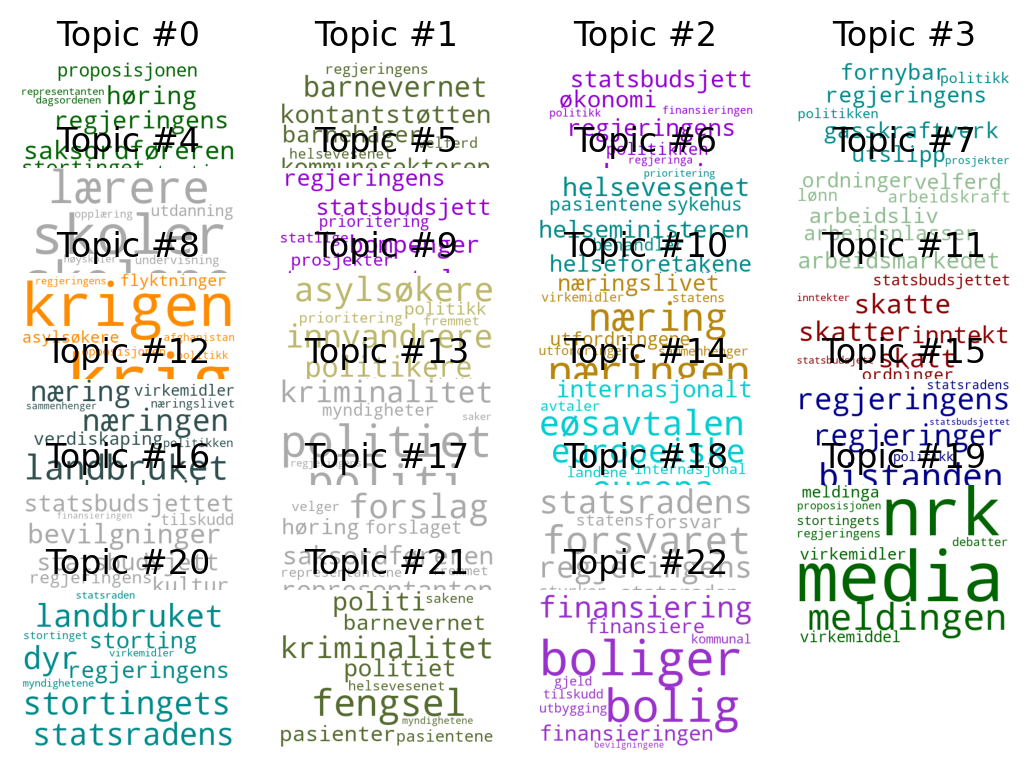

In [14]:
from utils.tables_and_plots import display_n_wordclouds

wordcloud = display_n_wordclouds(topic_word_scores, f"{model_name}-{embedding_model}: {data_type}",num_topics, dpi=200)


In [15]:
from utils.tables_and_plots import create_wordcloud

wordcloud.savefig(os.path.join(ROOT_PATH,folder_path_word_cloud,f"{file_name}_wordcloud"))
file_name_model = "wordcloud"
for i in range(num_topics):
    topic_wordcloud = create_wordcloud(topic_word_scores[i])
    topic_wordcloud.to_file(os.path.join(ROOT_PATH, folder_path_word_cloud, str(file_name_model + f"_{i}.png")))

In [16]:
from utils.filemanagement import write_topics_file

topic_words_numbered = [(i, list(topic_words[i])) for i in range(num_topics)]

write_topics_file(folder_path_topics, file_name, topic_words_numbered)

In [17]:
from utils.filemanagement import load_model_topics

loaded_topics = load_model_topics(folder_path_topics, file_name)

In [18]:
folder_path_frequencies = r"preprocessed_data/stats"
file_name_co_frequencies = f"{data_type}_co_freq"
file_name_frequencies=f"{data_type}_freq"

In [19]:
len(loaded_topics.values())

23

In [20]:

from utils.filemanagement import load_word_frequencies

word_frequencies = load_word_frequencies(folder_path_frequencies, file_name_frequencies)

In [21]:
from utils.filemanagement import load_zipped_word_co_frequencies

word_co_frequencies = load_zipped_word_co_frequencies(folder_path_frequencies,file_name_co_frequencies)

In [22]:
from utils.stats import compute_metrics
input_data = list(loaded_topics.values())
coherence, diversity = compute_metrics(
    input_data, word_frequencies, word_co_frequencies, 10)

10
('saksordføreren', 'stortingets') wordtuple
('saksordføreren', 'stortingets') wordup
15.0 over
16280.0 under
-10.083922483545091 -3.9068905956085187 2.5810608812234905 ('saksordføreren', 'stortingets') 15 110 148
('høring', 'saksordføreren') wordtuple
('høring', 'saksordføreren') wordup
6.0 over
8030.0 under
-10.386221771683521 -2.584962500721156 4.0179390489362845 ('høring', 'saksordføreren') 6 110 73
('regjeringens', 'saksordføreren') wordtuple
('regjeringens', 'saksordføreren') wordup
15.0 over
35640.0 under
-11.214319120800766 -3.9068905956085187 2.870394971747111 ('regjeringens', 'saksordføreren') 15 110 324
('saksordføreren', 'stortinget') wordtuple
('saksordføreren', 'stortinget') wordup
148.0 over
167860.0 under
-10.14744559473024 -7.209453365628949 1.4075194165355394 ('saksordføreren', 'stortinget') 148 110 1526
('saksordføreren', 'storting') wordtuple
('saksordføreren', 'storting') wordup
13.0 over
10890.0 under
-9.710276615463178 -3.700439718141092 2.62408723154153 ('saks

In [23]:
from nltk import word_tokenize
from utils.config import use_pmi
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
if not use_pmi:
    corpus_tokenized = []
    for item in new_data:
        word_tokens = word_tokenize(item)
        corpus_tokenized.append(word_tokens)

    dct = Dictionary(corpus_tokenized)
    inp = list(loaded_topics.values())


    cm = CoherenceModel(topics=inp, texts = corpus_tokenized, dictionary=dct, coherence='c_npmi')
    coherence2 = cm.get_coherence()  # get coherence value
    print(coherence2)

-0.22892139590944796


In [24]:
diversity

0.6130434782608696

In [25]:
coherence

2.7590042122339726

In [26]:
from tabulate import tabulate
import csv

In [27]:
# Check the stats for the dataset after running basic pipeline

models = [file_name for i in range(0, 2)]
metrics = ["coherence" if i < 1 else "diversity" for i in range(0, 2)]
values = [
    coherence,
    diversity
    ]

stats = [models, metrics, values]
stats_tabulate = list(zip(*stats))
print(tabulate(stats_tabulate, headers=["Model", "Metric", "Value"], tablefmt="fancy_grid"))

╒═════════════════════════════════════════════════════════════╤═══════════╤══════════╕
│ Model                                                       │ Metric    │    Value │
╞═════════════════════════════════════════════════════════════╪═══════════╪══════════╡
│ top2vec_distiluse-base-multilingual-cased_np_mini_stopwords │ coherence │ 2.759    │
├─────────────────────────────────────────────────────────────┼───────────┼──────────┤
│ top2vec_distiluse-base-multilingual-cased_np_mini_stopwords │ diversity │ 0.613043 │
╘═════════════════════════════════════════════════════════════╧═══════════╧══════════╛


In [28]:
# Save all topic stats to file

topic_stats_folder_path = fr"preprocessed_data/metrics/{experiment}/{model_type}"
topic_stats_file_name = f"{file_name}_stats"
topic_stats_path = os.path.join(ROOT_PATH,topic_stats_folder_path, topic_stats_file_name + r".csv")

TOPIC_STAT = "Topic stat"
VALUE = "Value"

with open(topic_stats_path, encoding="utf-8", mode="w", newline="") as topic_stats_file:
    header = [TOPIC_STAT, VALUE]
    writer = csv.DictWriter(topic_stats_file, fieldnames=header, delimiter=";")
    writer.writeheader()
    writer.writerow({TOPIC_STAT : "Coherence", VALUE : coherence})
    writer.writerow({TOPIC_STAT : "Diversity", VALUE : diversity})